<a href="https://colab.research.google.com/github/yardsale8/DSCI_210_R_notebooks/blob/main/lecture_7_1_2_group_and_aggregate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run this each time you restart the notebook.

In [2]:
# Always run this first
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Grouping and Aggregating in R

## Outline

1.  Simple Aggregation
2.  Grouped Aggregation
3.  Dealing with `NA`s
4.  Save/output a table

## Loading `NC_births`

Run this each time you restart the Colab notebook.

In [37]:
births <- read.csv('https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/NC_Birth.csv')
head(births)

,Father.Minority,Father.Age,Father.Years.of.Education,Mother.Minority,Mother.Age,Mother.Years.of.Education,Marital.Status,Mother.Smoker,Mother.Avg.Cigs,Mother.Weight.Gain,⋯,Month.of.Birth,Day.of.Birth,Gender,Number.of.Prenatal.Visits,Kotelchuck.Index,Gestational.Age,Birth.Weight.Grams,Low.Birth,Apgar.Score.One.Minute,Apgar.Score.Five.Minutes
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
1,Nonwhite,50,12,White,24,15,Unmarried,N,0,50,⋯,2,23,Female,10,3_Adequate,38,2866,N,9,9
2,White,19,9,White,18,9,Unmarried,Y,23,35,⋯,1,25,Female,9,3_Adequate,35,3121,N,8,9
3,White,37,17,White,35,17,Married,N,0,24,⋯,1,25,Female,20,4_AdequatePlus,38,2667,N,8,9
4,,NA,NA,Nonwhite,22,14,Unmarried,N,0,33,⋯,11,10,Male,15,4_AdequatePlus,38,2696,N,8,9
5,Nonwhite,39,11,Nonwhite,31,16,Unmarried,N,0,30,⋯,5,18,Female,12,1_Inadequate,38,2979,N,4,9
6,White,20,11,Nonwhite,19,12,Unmarried,N,0,10,⋯,11,6,Male,10,4_AdequatePlus,36,3036,N,9,9


## Topic 1 - Simple aggregation

<img src="https://github.com/yardsale8/DSCI_210_R_notebooks/blob/main/img/simple_aggregation.png?raw=1" width=600>

#### Performing a simple aggregation

We can perform an simple aggregation using `summarise` as follows

```{R}
(table_name
 %>% summarize(output_name = summary_function(column_name))
 )
```

Where the names are replaced with names from the data table.

#### Example - Average Birth Weight

In [38]:
(births
 %>% summarise(avg_weight = mean(Birth.Weight.Grams))
)

avg_weight
<dbl>
3242.693


### Important note

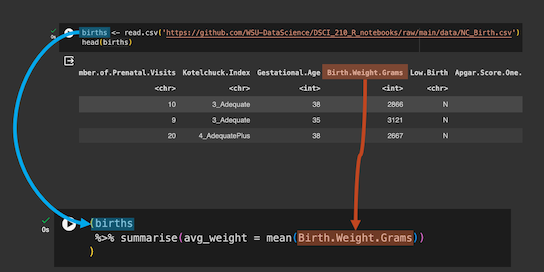

Match table/column names *exactly*!

### Saving the resulting table

* By default, the output table is temporary.
* To save the result, use ` -> table_name` at the bottom of the pipe.


In [39]:
(births
 %>% summarise(avg_weight = mean(Birth.Weight.Grams))
) -> avg_wgt

avg_wgt

avg_weight
<dbl>
3242.693


## <font color="red"> Exercise 7.1.3 </font>

**Task.** Compute the average gestational age of all the babies.

In [40]:
# Your code here

## Topic 2 - Grouped aggregation

<img src="https://github.com/yardsale8/DSCI_210_R_notebooks/blob/main/img/group_and_aggregate.png?raw=1" width=600>



### One grouping variable

Using `group_by`

In [46]:
(births
 %>% group_by(Gender)
 %>% summarize(avg_wt = mean(Birth.Weight.Grams))
 )

Gender,avg_wt
<chr>,<dbl>
Female,3203.117
Male,3279.816


Using `.by` argument in `summarise`

In [47]:
(births
 %>% summarize(avg_wt = mean(Birth.Weight.Grams),
              .by = Gender)
 )

Gender,avg_wt
<chr>,<dbl>
Female,3203.117
Male,3279.816


### I prefer using `.by` because ...

1. It doesn't change the output type
2. Avoids unnecessary warnings
3. Removes the need to `ungroup`

#### Two grouping variables

Using `group_by` in the pipe

In [48]:
(births
 %>% group_by(Gender, Marital.Status)
 %>% summarize(avg_wt = mean(Birth.Weight.Grams))
 )

`summarise()` has grouped output by 'Gender'. You can override using the
`.groups` argument.


Gender,Marital.Status,avg_wt
<chr>,<chr>,<dbl>
Female,Married,3249.788
Female,Unmarried,3137.405
Male,Married,3321.245
Male,Unmarried,3219.448


Using `.by` argument in `summarise`

In [49]:
(births
 %>% summarize(avg_wt = mean(Birth.Weight.Grams),
               .by = c(Gender, Marital.Status)
              )
 )

Gender,Marital.Status,avg_wt
<chr>,<chr>,<dbl>
Female,Unmarried,3137.405
Female,Married,3249.788
Male,Unmarried,3219.448
Male,Married,3321.245


### Computing multiple statistics in one `summarise`

#### Simple aggregation

In [50]:
(births
 %>% summarise(avg_weight = mean(Birth.Weight.Grams),
               SD_weight = sd(Birth.Weight.Grams))
)

avg_weight,SD_weight
<dbl>,<dbl>
3242.693,601.4601



#### Grouped aggregation

In [69]:
(births
 %>% summarize(avg_wt = mean(Birth.Weight.Grams),
               SD_wt = sd(Birth.Weight.Grams),
               .by = c(Gender, Marital.Status)
              )
 )

Gender,Marital.Status,avg_wt,SD_wt
<chr>,<chr>,<dbl>,<dbl>
Female,Unmarried,3137.405,581.9819
Female,Married,3249.788,585.7430
Male,Unmarried,3219.448,583.8308
Male,Married,3321.245,629.5641


## Topic 3 - Saving output table to a CSV file

1. Save the table using `->` at the end of the pipe.
2. Inspect the table by putting the table name on the last row.
3. Use `write.csv(table, "file.csv")` to output the CSV file.
4. Find and download the CSV from the Colab Content folder.

#### Step 1 - Save and inspect the table

In [71]:
(births
 %>% summarize(avg_wt = mean(Birth.Weight.Grams),
               SD_wt = sd(Birth.Weight.Grams),
               .by = c(Gender, Marital.Status)
              )
 ) -> birth_weight_summary_by_gender_and_marital_status

birth_weight_summary_by_gender_and_marital_status

Gender,Marital.Status,avg_wt,SD_wt
<chr>,<chr>,<dbl>,<dbl>
Female,Unmarried,3137.405,581.9819
Female,Married,3249.788,585.7430
Male,Unmarried,3219.448,583.8308
Male,Married,3321.245,629.5641


#### Step 2 - Output the table to a CSV with `write.csv`

In [76]:
write.csv(birth_weight_summary_by_gender_and_marital_status, "birth_weight_summary_by_gender_and_marital_status.csv")

#### Step 3 - Downloading the result from `Files > Content`

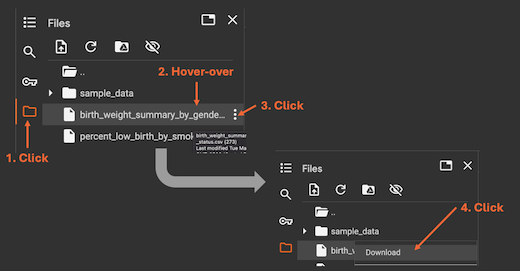

## Topic 4 - Dealing with missing data

* Most programs ignore missing data
* `R` treats them differently

### Beware of `NA`!

`NA + 1 == NA` in R

#### "Unknown" + 1 = "Unknown"

In [41]:
NA + 1

[1] NA

#### `mean` with "Unknown" is "Unknown"

In [42]:
values = c(1, 3, 5, 4, NA)
mean(values)

[1] NA

#### `na.rm = TRUE` means ignore unknown values

In [43]:
mean(values, na.rm = TRUE)

[1] 3.25

#### Example - Average Father's Age

In [44]:
(births
 %>% summarize(avg_father_educ = mean(Father.Years.of.Education))
 )

avg_father_educ
<dbl>
NA


#### Set `na.rm=TRUE` to ignore `NA`

In [45]:
(births
 %>% summarize(avg_father_educ = mean(Father.Years.of.Education, na.rm = TRUE))
 )

avg_father_educ
<dbl>
12.79394


## <font color="red"> Exercise 7.1.4 </font>

Use `group_by` and/or `summarise` to perform each of the following tasks.

**Tasks:**

1. Compute the following statistics when grouping by mother's smoking status (`Mother.Smoker`)<br>
    a. average (`mean`) and standard deviation(`sd`) of the birth weights (`Gestastation.Age`), and<br>
    b. average and standard deviation of the mother's educational level. <br>
2. Save the table to an appropriate name.
3. Output the table to a CSV file.
4. Download and submit the CSV file.

In [52]:
# Your code here

## Deliverables

Be sure to upload the following to D2L

1. A WORD document containing screenshots of your work on each <font color="red"> <b>Exercise</b></font>,
2. A share link to your copy of the notebook (with proper permissions), and
3. The CSV file from the last <font color="red"> <b>Exercise</b></font>

## Appendix - Translating Prep to `dplyr`


#### Simple Aggregation

```{R}
(births
 %>% summarise(avg_weight = mean(Birth.Weight.Grams))
)
```

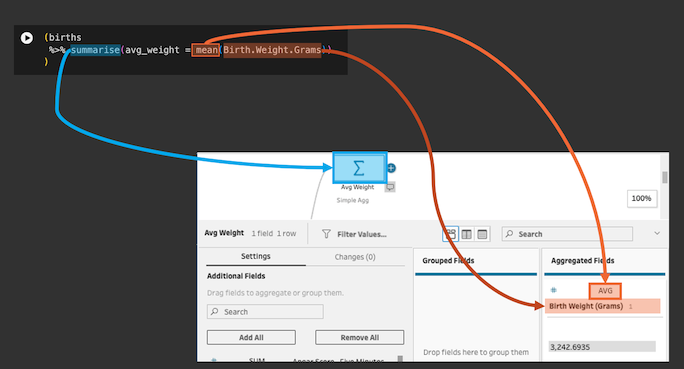

#### Grouped Aggregation

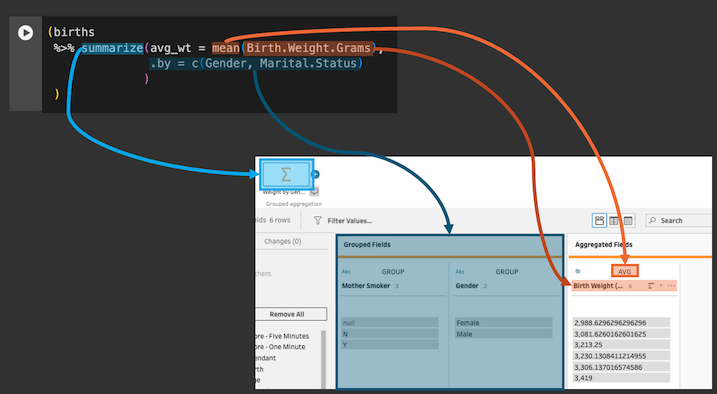